In [23]:

import sys
 
# setting path
sys.path.append('../../')

from pandas import read_csv, to_datetime, DataFrame
import pyfolio as pf
from API_test import get_portfolio_history
from datetime import datetime
from numpy import nan

In [3]:
YmdHMS_format = "%Y-%m-%d-%H-%M-%S"
Ymd_format = "%Y-%m-%d"
S_format = "%f"


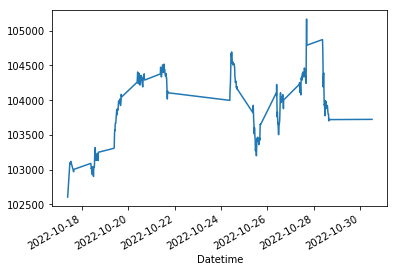

In [66]:
since = '2022-10-15'
df_pv = read_csv('portfolio_values.csv')
df_pv['Datetime'] = to_datetime(df_pv['Datetime'], format=YmdHMS_format)
# df_pv = df_pv.loc[df_pv['Datetime']>since,:]

df_orders = read_csv('orders.csv')
df_pos = read_csv('positions.csv')

df_orders['Datetime'] = to_datetime(df_orders['Datetime'], format=YmdHMS_format)
df_orders = df_orders.loc[df_orders['Datetime']>since,:]
df_pos['Datetime'] = to_datetime(df_pos['Datetime'], format=YmdHMS_format)
df_pos = df_pos.loc[df_pos['Datetime']>since,:]

def get_cash_value(row):

    if row.status=='filled':
        if row.side=='buy':
            return -row.filled_qty * row.filled_avg_price
        else:
            return row.filled_qty * row.filled_avg_price
    else:
        return nan

df_orders['cash'] = df_orders.apply(get_cash_value, axis=1)

df_pos_value = df_pos.groupby('Datetime')['market_value'].sum().to_frame()

df_temp = df_pos_value.merge(
    df_orders[['Datetime','cash']].dropna().groupby('Datetime').sum(),
    left_index=True, right_index=True, how='outer'
).sort_index()

base_equity = df_pv.loc[df_pv['Datetime']<df_pos['Datetime'].iloc[0],'equity'].iloc[-1]
base_cash = base_equity - df_pos_value['market_value'].iloc[0]

df_temp['cash'] = df_temp['cash'].fillna(0).cumsum()
df_temp['pv'] = df_temp['cash'] + base_cash + df_temp['market_value']
df_temp['pv'].plot()

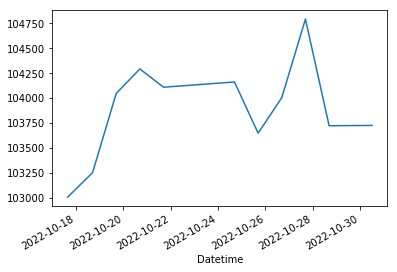

In [71]:
df_temp['Date'] = df_temp.index.to_series().apply(lambda x: x.strftime(Ymd_format))
df_temp.groupby('Date')['pv'].tail(1).plot()

In [72]:
df_pv

,Datetime,equity,profit_loss,profit_loss_pct,base_value,timeframe
0,2022-09-28 20:00:00,100245.95,540.280000,0.000000,100245.95,1D
1,2022-09-29 20:00:00,101085.96,842.669197,0.008406,100245.95,1D
2,2022-09-30 20:00:00,101860.14,774.180000,0.016129,100245.95,1D
3,2022-10-03 20:00:00,101075.82,-784.320000,0.008305,100245.95,1D
4,2022-10-04 20:00:00,102632.14,1556.320000,0.023830,100245.95,1D
5,2022-10-05 20:00:00,102511.58,-120.560000,0.022628,100245.95,1D
6,2022-10-06 20:00:00,102842.53,340.250000,0.026022,100245.95,1D
7,2022-10-07 20:00:00,104227.06,1384.530000,0.039835,100245.95,1D
8,2022-10-10 20:00:00,103318.78,-906.010000,0.030796,100245.95,1D
9,2022-10-11 20:00:00,102419.63,-897.009235,0.021847,100245.95,1D


In [61]:
pf.create_full_tear_sheet(df.set_index('Date')['equity'].pct_change(), test_path='/Users/yueyuchen/Documents/Academy/Research/PaperTrading/Results/SectorRFRank_10082022')

,equity
Date,
2022-09-28,NaN
2022-09-29,0.008379
2022-09-30,0.007659
2022-10-03,-0.007700
2022-10-04,0.015398
2022-10-05,-0.001175
2022-10-06,0.003228
2022-10-07,0.013463
2022-10-10,-0.008714


In [23]:
pf.compute_stats(df.set_index('Date')['equity'].pct_change().to_frame())

Start date,2022-09-28
End date,2022-10-28
Total months,1
,equity
Annual return,47.08%
Cumulative returns,3.58%
Annual volatility,10.94%
Sharpe ratio,3.742
Calmar ratio,27.151
Stability,0.652
Max drawdown,-1.73%


,equity
Annual return,47.08%
Cumulative returns,3.58%
Annual volatility,10.94%
Sharpe ratio,3.742
Calmar ratio,27.151
Stability,0.652
Max drawdown,-1.73%
Omega ratio,1.781
Sortino ratio,6.92
Skew,nan
